# Estatistica Descritiva

Este notebook tem como propósito a exploração e análise de um conjunto de dados relacionado ao mercado imobiliário nos Estados Unidos. A motivação por trás desta análise é compreender os fatores que influenciam a variação nos preços das residências, visando identificar as razões pelas quais algumas casas apresentam valores superiores em comparação a outras. Para atingir esse objetivo, empregaremos técnicas de estatística descritiva.

A estatística descritiva é uma abordagem estatística que nos permite resumir e interpretar padrões nos dados. Ao aplicar essas técnicas ao conjunto de dados do mercado imobiliário, buscamos extrair insights significativos sobre as características que impactam diretamente nos preços das residências. Essa compreensão mais profunda pode ser fundamental para investidores, compradores e agentes imobiliários, fornecendo uma base sólida para a tomada de decisões informadas.

Ao longo deste notebook, exploraremos diversas métricas estatísticas, gráficos descritivos e análises comparativas para revelar padrões e tendências presentes no mercado imobiliário. A intenção é não apenas identificar correlações entre variáveis, mas também oferecer uma visão abrangente das nuances que influenciam o valor das propriedades. Essas descobertas podem fornecer insights valiosos para os interessados no setor imobiliário, contribuindo para uma compreensão mais clara do cenário em questão.

## Iniciando o código 

Nesta etapa iremos realizar o import de alguns pacotes e importação dos nossos dados.

In [2]:
#Importando pacotes para realizar a análise de dados.

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [3]:
#Lendo o arquivo para iniciar as análises

df = pd.read_csv('../../data/Aula01 - Estatistica Descritiva/house_price.csv')
df

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,175000,6,5,3,7,1647,953,1999,RL,AllPub,1Fam
1456,1456,210000,6,6,3,7,2073,1542,1978,RL,AllPub,1Fam
1457,1457,266500,7,9,4,9,2340,1152,1941,RL,AllPub,1Fam
1458,1458,142125,5,6,2,5,1078,1078,1950,RL,AllPub,1Fam


In [4]:
#Verificando algumas informações do dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1460 non-null   int64 
 1   SalePrice     1460 non-null   int64 
 2   OverallQual   1460 non-null   int64 
 3   OverallCond   1460 non-null   int64 
 4   BedroomAbvGr  1460 non-null   int64 
 5   TotRmsAbvGrd  1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   TotalBsmtSF   1460 non-null   int64 
 8   YearBuilt     1460 non-null   int64 
 9   MSZoning      1460 non-null   object
 10  Utilities     1460 non-null   object
 11  BldgType      1460 non-null   object
dtypes: int64(9), object(3)
memory usage: 137.0+ KB


In [5]:
#Removendo coluna que não iremos utilizar
df = df[[ 'SalePrice', 'OverallQual', 'OverallCond', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'MSZoning',
       'Utilities', 'BldgType']] 

### Informações sobre o dataset

* Colunas: 

     **SalePrice:** Price of sale  
     **OverallQual:** Rates the overall material and finish of the house  
     **OverallCond:** Rates the overall condition of the house  
     **BedroomAbvGr:** Bedrooms above grade (does NOT include basement bedrooms)  
     **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)  
     **GrLivArea:** Above grade (ground) living area square feet  
     **TotalBsmtSF:** Total square feet of basement area  
     **YearBuilt:** Original construction date  
     **MSZoning:** Identifies the general zoning classification of the sale  
           &nbsp;&nbsp;&nbsp;&nbsp;A    Agriculture  
           &nbsp;&nbsp;&nbsp;&nbsp;C    Commercial  
           &nbsp;&nbsp;&nbsp;&nbsp;FV    Floating Village Residential  
           &nbsp;&nbsp;&nbsp;&nbsp;I     Industrial  
           &nbsp;&nbsp;&nbsp;&nbsp;RH    Residential High Density  
           &nbsp;&nbsp;&nbsp;&nbsp;RL    Residential Low Density  
           &nbsp;&nbsp;&nbsp;&nbsp;RP    Residential Low Density Park   
           &nbsp;&nbsp;&nbsp;&nbsp;RM    Residential Medium Density  
     **Utilities:** Type of utilities available  
           &nbsp;&nbsp;&nbsp;&nbsp;AllPub    All public Utilities (E,G,W,& S)      
           &nbsp;&nbsp;&nbsp;&nbsp;NoSewr    Electricity, Gas, and Water (Septic Tank)  
           &nbsp;&nbsp;&nbsp;&nbsp;NoSeWa    Electricity and Gas Only  
           &nbsp;&nbsp;&nbsp;&nbsp;ELO       Electricity only      
     **BldgType:** Type of dwelling  
           &nbsp;&nbsp;&nbsp;&nbsp;1Fam      Single-family Detached      
           &nbsp;&nbsp;&nbsp;&nbsp;2FmCon    Two-family Conversion; originally built as one-family dwelling  
           &nbsp;&nbsp;&nbsp;&nbsp;Duplx     Duplex  
           &nbsp;&nbsp;&nbsp;&nbsp;TwnhsE    Townhouse End Unit  
           &nbsp;&nbsp;&nbsp;&nbsp;TwnhsI    Townhouse Inside Unit  

In [6]:
#Verificando valores nulos

df.isnull().sum()

SalePrice       0
OverallQual     0
OverallCond     0
BedroomAbvGr    0
TotRmsAbvGrd    0
GrLivArea       0
TotalBsmtSF     0
YearBuilt       0
MSZoning        0
Utilities       0
BldgType        0
dtype: int64

In [7]:
#Verificando estatística descritvas das colunas numéricas

df.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.0,180921.195890,79442.502883,34900.0,129975.00,163000.0,214000.00,755000.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
BedroomAbvGr,1460.0,2.866438,0.815778,0.0,2.00,3.0,3.00,8.0
TotRmsAbvGrd,1460.0,6.517808,1.625393,2.0,5.00,6.0,7.00,14.0
GrLivArea,1460.0,1515.463699,525.480383,334.0,1129.50,1464.0,1776.75,5642.0
TotalBsmtSF,1460.0,1057.429452,438.705324,0.0,795.75,991.5,1298.25,6110.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0


In [79]:
#Criando variável preço por pé quadrado 

df['PriceToArea'] = df['SalePrice'] / df['GrLivArea']
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.0,180921.195890,79442.502883,34900.000000,129975.000000,163000.000000,214000.000000,755000.000000
OverallQual,1460.0,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.0,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
BedroomAbvGr,1460.0,2.866438,0.815778,0.000000,2.000000,3.000000,3.000000,8.000000
TotRmsAbvGrd,1460.0,6.517808,1.625393,2.000000,5.000000,6.000000,7.000000,14.000000
GrLivArea,1460.0,1515.463699,525.480383,334.000000,1129.500000,1464.000000,1776.750000,5642.000000
TotalBsmtSF,1460.0,1057.429452,438.705324,0.000000,795.750000,991.500000,1298.250000,6110.000000
YearBuilt,1460.0,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
PriceToArea,1460.0,120.572878,31.391081,28.358738,99.822008,120.099031,138.700041,276.250881


C:\Users\klace\AppData\Local\Temp\ipykernel_14360\1458347046.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i*2].set_xticklabels(axes[i*2].get_xticklabels(), rotation=45, ha='right')
C:\Users\klace\AppData\Local\Temp\ipykernel_14360\1458347046.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i*2 + 1].set_xticklabels(axes[i*2 + 1].get_xticklabels(), rotation=45, ha='right')
C:\Users\klace\AppData\Local\Temp\ipykernel_14360\1458347046.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i*2].set_xticklabels(axes[i*2].get_xticklabels(), rotation=45, ha='right')
C:\Users\klace\AppData\Local\Temp\ipykernel_14360\1458347046.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after

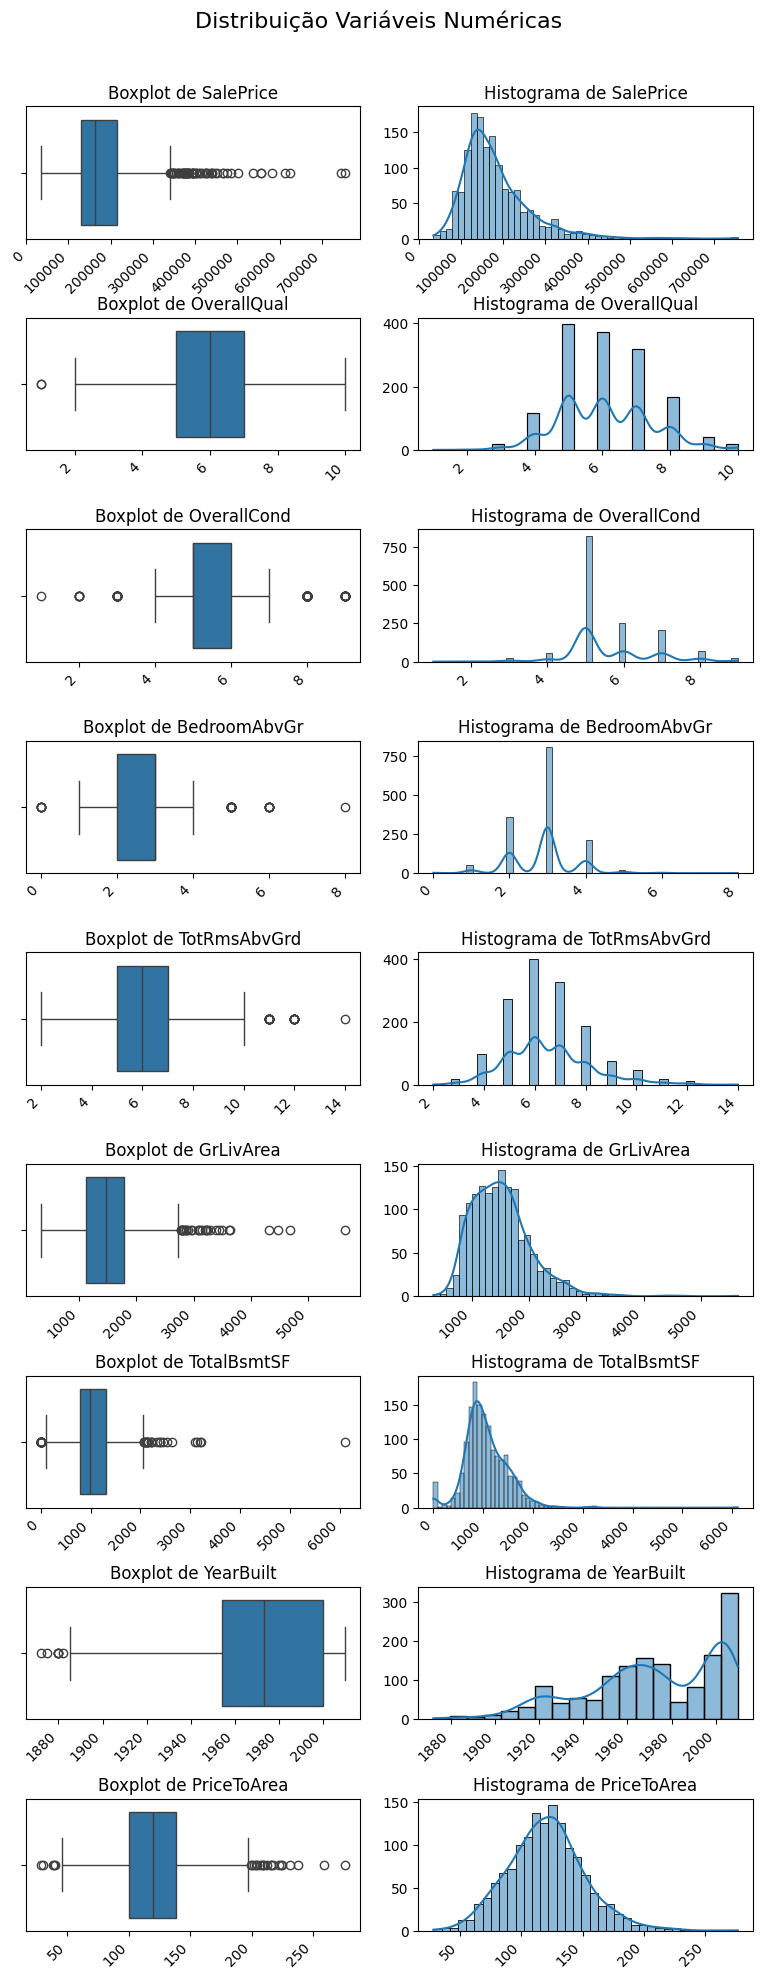

In [78]:
#Boxplot de todas as variavies numéricas
#Boxplot de todas as variavies numéricas
fig,axes = plt.subplots(ncols=2,nrows=9,figsize = (8,20))
axes = axes.flatten()
fig.suptitle('Distribuição Variáveis Numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(hspace=0.6)
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    sns.boxplot(x=df[col], ax=axes[i*2])
    axes[i*2].set(xlabel='')
    axes[i*2].set_title(f'Boxplot de {col}')
    axes[i*2].set_xticklabels(axes[i*2].get_xticklabels(), rotation=45, ha='right') 
    # Histograma à direita
    sns.histplot(df[col], ax=axes[i*2 + 1], kde=True)
    axes[i*2 + 1].set_title(f'Histograma de {col}')
    axes[i*2 + 1].set(xlabel='',ylabel='')
    axes[i*2 + 1].set_xticklabels(axes[i*2 + 1].get_xticklabels(), rotation=45, ha='right') 

In [85]:
df['CatTotalPreco'] = np.where(df['SalePrice']>df['SalePrice'].quantile(0.75),'cara','barata')
df['CatPriceToArea'] = np.where(df['PriceToArea']>df['PriceToArea'].quantile(0.75),'cara','barata')
df

,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType,PriceToArea,CatTotalPreco,CatPriceToArea
0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam,121.929825,barata,barata
1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam,143.819334,barata,cara
2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam,125.139978,cara,barata
3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam,81.537566,barata,barata
4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam,113.739763,cara,barata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,5,3,7,1647,953,1999,RL,AllPub,1Fam,106.253795,barata,barata
1456,210000,6,6,3,7,2073,1542,1978,RL,AllPub,1Fam,101.302460,barata,barata
1457,266500,7,9,4,9,2340,1152,1941,RL,AllPub,1Fam,113.888889,cara,barata
1458,142125,5,6,2,5,1078,1078,1950,RL,AllPub,1Fam,131.841373,barata,barata


[Text(0.5, 0, 'Categoria'), Text(0, 0.5, 'Area')]

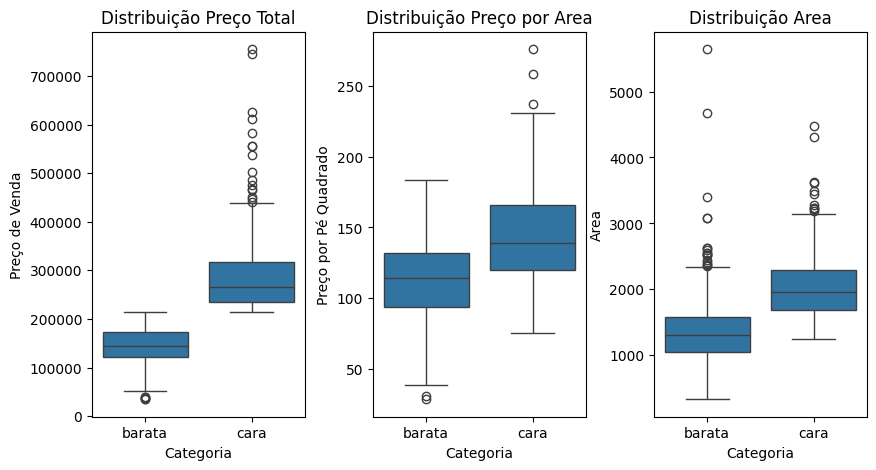

In [116]:
#No curso foi definido que uma casa cara seria uma casa que estivesse qual o valor maior que o terceiro quartil da coluna 
#preço de venda, quis verificar se as casas consideradas baratas, teriam o valor do pé quadrado menor do que as casas
#consideradas caras. Nesse gráfico podemos verificar que não, uma pode ser considerada barata porém ter um preço por pé
#quadrado maior do que uma casa considerada cara.

fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(10,5))
plt.subplots_adjust(wspace=0.32)

sns.boxplot(x='CatTotalPreco',y='SalePrice',data=df,ax=ax[0])
ax[0].set_title('Distribuição Preço Total') 
ax[0].set(xlabel='Categoria',ylabel='Preço de Venda')

sns.boxplot(x='CatTotalPreco',y='PriceToArea',data=df,ax=ax[1])
ax[1].set_title('Distribuição Preço por Area') 
ax[1].set(xlabel='Categoria',ylabel='Preço por Pé Quadrado')

sns.boxplot(x='CatTotalPreco',y='GrLivArea',data=df,ax=ax[2])
ax[2].set_title('Distribuição Area') 
ax[2].set(xlabel='Categoria',ylabel='Area')


In [127]:
df.groupby('CatTotalPreco').agg({'SalePrice':('mean','median','min','max'),
                                       'PriceToArea': ('mean','median','min','max'),
                                       'GrLivArea':('mean','median','min','max')})

SalePrice                           PriceToArea  \
                        mean    median     min     max        mean   
CatTotalPreco                                                        
barata         145414.087432  144000.0   34900  214000  112.776590   
cara           288619.552486  264780.5  214500  755000  144.220182   

                                                    GrLivArea                \
                   median        min         max         mean  median   min   
CatTotalPreco                                                                 
barata         114.400165  28.358738  183.844340  1342.642077  1308.5   334   
cara           139.072780  75.514139  276.250881  2039.657459  1956.0  1252   

                     
                max  
CatTotalPreco        
barata         5642  
cara           4476